## 12. Bayesian Inference

### 12.1 Bayesian Philosophy

Postulates of **frequentist (or classical)** inference:

- Probabilty refers to limiting relative frequencies.  Probabilities are objective properties of the real world.
- Parameters are fixed, usually unknown constants.  Because they are not fluctuating, no probability statements can be made about parameters.
- Statistical procedures should be designed to have well defined long run frequency properties.  For example, a 95% confidence interval should trap the true value of the parameter with limiting frequency at least 95%.

Postulates of **Bayesian** inference:

- Probability indicates degrees of belief, not limiting frequency.  As such, we can make probability statements about lots of things, not just data which are subject to random variation.  For example, I might say that 'the probability that Albert Einstein drank a cup of tea on August 1 1948 is 35%'.  This does not refer to limiting frequency.  It reflects my strength of belief that the proposition is true.
- We can make probability statements about parameters, even though they are fixed constants.
- We can make inferences about a parameter $\theta$, by producing a probability distribution for $\theta$.  Inferences, such as point estimates and interval estimates, may then be extracted from this distribution.

### 12.2 The Bayesian Method

Bayesian inference is usually carried out in the following way:

1. Choose a probability density $f(\theta)$ -- called the **prior distribution** -- that expresses our degrees of belief about a parameter $\theta$ before we see any data.

2. We choose a statistical model $f(x | \theta)$ that reflects our beliefs about $x$ given $\theta$.

3. After observing data $X_1, \dots, X_n$, we update our beliefs and form the **posterior distribution** $f(\theta | X_1, \dots, X_n)$.

Bayesian update:

$$f(\theta | x^n) = \frac{f(x^n | \theta) f(\theta)}{\int f(x^n | \theta) f(\theta) d\theta} 
= \frac{\mathcal{L}_n(\theta) f(\theta)}{\int \mathcal{L}_n f(\theta) d\theta}
\propto \mathcal{L}_n(\theta) f(\theta)$$

We throw away the denominator, which is a constant that does not depend on $\theta$, called a **normalizing constant**.  We can summarize this by writing:

$$ \text{"posterior is proportional to likelihood times prior"} $$

We can obtain a **point estimate** using the posterior mean:

$$ \overline{\theta} = \int \theta f(\theta | x^n) d\theta = \frac{\int \theta \mathcal{L}_n(\theta) f(\theta)}{\int \mathcal{L}_n(\theta) f(\theta) d\theta}$$

We can also obtain a Bayesian interval estimate. Define $a$ and $b$ by $ \int_{-\infty}^a f(\theta | x^n) d\theta = \int_b^\infty f(\theta | x^n) d\theta = \alpha / 2$.  Let $C = (a, b)$.  Then

$$\mathbb{P}(\theta \in C | x^n) = \int_a^b f(\theta | x^n) d\theta = 1 - \alpha$$

so **$C$ is a $1 - \alpha$ posterior interval**.

When the prior and the posterior are in the same family, we say the prior is **conjugate**.

### 12.3 Functions of Parameters

The posterior CDF for $\tau = g(\theta)$ is

$$ H(\tau | x^n) = \mathbb{P}(g(\theta) \leq \tau) = \int_A f(\theta | x^n) d\theta$$

where $A = \{ \theta : g(\theta) \leq \tau \}$.  The posterior density is $h(\tau | x^n) = H'(\tau | x^n)$.

### 12.4 Simulation

The posterior can often be approximated by simulation.  Suppose we draw $\theta_1, \dots, \theta_B \sim p(\theta | x^n)$.  Then a histogram of $\theta_1, \dots, \theta_n$ approximates the posterior density $p(\theta | x^n)$.  An approximation to the posterior mean $\overline{\theta}_n = \mathbb{E}(\theta | x^n)$ is $B^{-1} \sum_{j=1}^B \theta_j$.  The posterior $1 - \alpha$ interval can be approximated by $(\theta_{\alpha/2}, \theta_{1 - \alpha/2})$ where $\theta_{\alpha/2}$ is the $\alpha/2$ sample quantile of $\theta_1, \dots, \theta_B$.

Once we have a sample $\theta_1, \dots, \theta_B$ from $f(\theta | x^n)$, let $\tau_i = g(\theta_i)$.  Then $\tau_1, \dots, \tau_B$ is a sample from $f(\tau | x^n)$.  This avoids the need to do analytical calculations.  Simulation is discussed in more detail later in the book.

### 12.5 Large Sample Properties for Bayes' Procedures

**Theorem 12.5**. Under appropriate regularity conditions, we have that the posterior is approximately $N(\hat{\theta}, \hat{\text{se}}^2)$ where $\hat{\theta}_n$ is the MLE and $\hat{\text{se}} = 1 / \sqrt{nI(\hat{\theta}_n)}$.  Hence, $\overline{\theta}_n \approx \hat{\theta}_n$.  Also, if $C_n = (\hat{\theta}_n - z_{\alpha/2} \hat{\text{se}}, \hat{\theta}_n + z_{\alpha/2} \hat{\text{se}})$ is the asymptotic frequentist $1 - \alpha$ confidence interval, then $C_n$ is also an approximate $1 - \alpha$ Bayesian posterior interval:

$$\mathbb{P}(\theta \in C_n | X^n) \rightarrow 1 - \alpha$$

There is also a **Bayesian delta method**.  Let $\tau = g(\theta)$.  Then

$$ \tau | X^n \approx N(\hat{\tau}, \overline{\text{se}}^2)$$

where $\hat{\tau} = g(\hat{\theta})$ and $\overline{\text{se}} = \text{se} | g'(\hat{\theta}) |$.

### 12.6 Flat Priors, Improper Priors and "Noninformative" Priors

**Improper priors**.  We can adopt a flat prior $f(\theta) \propto c$ where $c > 0$ is a constant.  Note that $\int f(\theta) d\theta = \infty$ so this is not a real probability density function in a proper sense. We call such prior an improper prior.  In general, improper priors are not a problem as long as the resulting posterior is a well defined probability distribution.

**Flat priors are not invariant**.  The notion of a flat prior is not well-defined because a flat prior on a parameter does not imply a flat prior ron a transformed version of a parameter.

**Jeffrey's prior**.  Take $f(\theta) \propto I(\theta)^{1/2}$ where $I(\theta)$ is the Fisher information function.  This rule turns out to be transformation invariant.

In a multiparameter problem, the Jeffrey's prior is defined to be $f(\theta) \propto \sqrt{\text{det} I(\theta)}$, where $\text{det}(A)$ denotes the determinant of a matrix $A$.

### 12.7 Multiparameter Problems

Suppose that $\theta = (\theta_1, \dots, \theta_p)$.  The posterior density is still given by

$$p(\theta | x^n) \propto \mathcal{L}(\theta) f(\theta)$$

Suppose we want to make inferences for $\theta_1$.  The marginal posterior for $\theta_1$ is

$$ f(\theta_1 | x^n) = \int \cdots \int f(\theta_1, \dots, \theta_p) d\theta_2 \dots d\theta_p$$

In practice, it might not be feasible to do this integral.  Simulation can help.  Draw randomly from the posterior:

$$\theta^1, \dots, \theta^B \sim f(\theta | x^n)$$

where the superscripts index the different draws; each $\theta^j$ is a vector $\theta^j = (\theta^j_1, \dots, \theta^j_p)$.  Now collect together the first component of each draw:

$$\theta^1_1, \dots, \theta^B_1$$

These form a sample from $f(\theta_1 | x^n)$ and we have avoided doing any integrals.

### 12.8 Strenghts and Weaknesses of Bayesian Inference

Frequentist and Bayesian methods are answering different questions:

- To combine prior beliefs with data in a principled way, use bayesian inference.
- To construct procedures with guaranteed long run performance, such as confidence intervals, use frequentist methods.

### 12.9 Appendix

**Proof of Theorem 12.5**.

It can be shown that the effect of the prior diminishes as $n$ increases so that $f(\theta | X^n) \propto \mathcal{L}_n(\theta)f(\theta) \approx \mathcal{L}_n(\theta)$.  Hence, $\log f(\theta | X^n) \approx \ell(\theta)$.  Now, $\ell(\theta) \approx \ell(\hat{\theta}) + (\theta - \hat{\theta})\ell'(\hat{\theta}) + [(\theta - \hat{\theta})^2/2]\ell''(\hat{\theta}) = \ell(\hat{\theta}) + [(\theta - \hat{\theta})^2/2] \ell''(\hat{\theta})$ since $\ell'(\hat{\theta}) = 0$.  Exponentiating, we get approximately that

$$ f(\theta | X^n) \propto \exp \left\{ - \frac{1}{2} \frac{(\theta - \hat{\theta})^2}{\sigma_n^2} \right\} $$

where $\sigma_n^2 = 1 / \ell''(\hat{\theta}_n)$.  So the posterior of $\theta$ is approximately Normal with mean $\hat{\theta}$ and variance $\sigma^2_n$.  Let $\ell_i = \log f(X_i | \theta)$, then

$$
\begin{align}
\sigma_n^{-2} &= -\ell''(\hat{\theta}_n) = \sum_i -\ell''_i(\hat{\theta}_n) \\
&= n \left( \frac{1}{n} \right) \sum_i -\ell''_i(\hat{\theta}_n) \approx n \mathbb{E}\left[-\ell''_i(\hat{\theta}_n)\right] \\
&= n I(\hat{\theta}_n)
\end{align}
$$

and hence $\sigma_n \approx \text{se}(\hat{\theta})$.

### 12.11 Exercises

**Exercise 12.11.1**.  Verify (12.5).

*Let $X_1, \dots, X_n \sim N(\theta, \sigma^2)$.  For simplicity, let us assume that $\sigma$ is known.  Suppose that we take as a prior $\theta \sim N(a, b^2)$.  In problem 1 of the homework, it is shown that the posterior for $\theta$ is* 

$$\theta | X^n \sim N(a, b^2)$$

*where*

$$\overline{\theta} = w \overline{X} + (1 - w) a$$

*where*

$$w = \frac{\frac{1}{\text{se}^2}}{\frac{1}{\text{se}^2} + \frac{1}{\text{b}^2}} \quad \text{and} \quad \frac{1}{\tau^2} = \frac{1}{\text{se}^2} + \frac{1}{b^2}$$

*and $\text{se} = \sigma / \sqrt{n}$ is the standard error of the MLE $\overline{X}$.*

**Solution**.

TODO

**Exercise 12.11.2**.  Let $X_1, \dots, X_n \sim N(\mu, 1)$.

**(a)** Simulate a dataset (using $\mu = 5$) consisting of $n = 100$ observations.

**(b)** Take $f(\mu) = 1$ and find the posterior density.  Plot the density.

**(c)** Simulate 1000 draws from the posterior.  Plot a histogram of the simulated values and compare the histogram to the answer in (b).

**(d)** Let $\theta = e^\mu$.  Find the posterior density for $\theta$ analytically and by simulation.

**(e)** Find a 95% posterior interval for $\theta$.

**(f)** Find a 95% confidence interval for $\theta$.

**Solution**.

**(a)**

In [1]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

n = 100
mu = 5
sigma = 1
X = norm.rvs(loc=mu, scale=sigma, size=n)

**(b)**  The posterior is proportional to likelihood times the prior:

$$f(\mu | X^n) \propto \mathcal{L}_n(\mu) f(\mu) = \mathcal{L}_n(\mu)$$

But the likelihood is the product of the PDFs for each data point:

$$\mathcal{L}_n(\mu) = \prod_{i=1}^n f(X_i; \mu)$$

We can plot this with "brute force" -- calculating this product for each sample point -- or use the analytic result that the likelihood is proportional to a random variable following a Normal distribution in $\mu$ with mean $\hat{\mu} = \overline{X}$ and standard error $\sigma / \sqrt{n}$:

$$\mathcal{L}_n(\mu) \propto N(\overline{X}, \sigma^2 / n)$$

In [2]:
# posterior is proportional to likelihood times f(\mu)
# likelihood is \prod_i f(X_i; \mu)
# pdf is f(x; (\mu, \sigma^2)), the density of the normal function

mu_hat = X.mean()
mu_values = np.linspace(4, 6, 100)

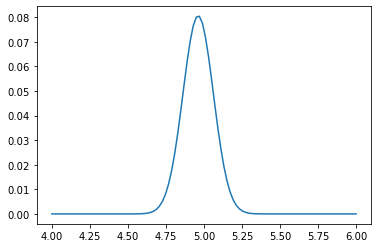

In [3]:
# Brute-force solution: explicitly compute the PDF for each sample, and multiply everything 
# (or take logs, add, and exponentiate):
likelihood = np.vectorize(lambda mu_hat: np.exp(np.log(norm.pdf(X, loc=mu_hat, scale=sigma)).sum()))
L_i = likelihood(mu_values)

plt.plot(mu_values, L_i / L_i.sum());

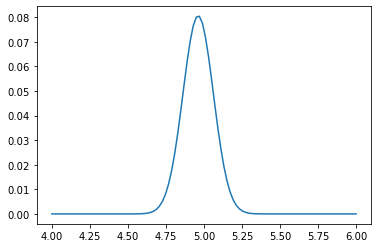

In [4]:
# Alternatively, use the analytic solution, \mathbb{L}_n(\mu) \sim N(\mu_hat, \sigma^2/n)

L_i2 = norm.pdf(mu_values, loc=mu_hat, scale=sigma/np.sqrt(n))

plt.plot(mu_values, L_i2 / L_i2.sum());

**(c)**

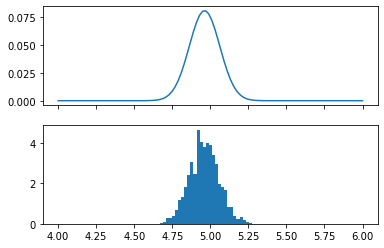

In [5]:
fig, (ax1,ax2) = plt.subplots(2, 1, sharex='col')
ax1.plot(mu_values, L_i2 / L_i2.sum())

posterior_samples = norm.rvs(loc=mu_hat, scale=sigma/np.sqrt(n), size=1000)
ax2.hist(posterior_samples, density=True, bins=mu_values);

**(d)**

Let $Y = e^X$.  Analytically:

- The CDF is $F_Y(z) = \mathbb{P}_\theta(e^X \leq z) = \mathbb{P}_\mu(X \leq \log z) = \mathbb{P}_\mu \left( \frac{X - \mu}{\sigma} \leq \frac{\log z - \mu}{\sigma} \right) = \mathbb{P}(Z \leq \log z - \mu) = \Phi(\log z - \mu)$, where $\Phi$ is the CDF of a standard normal distribution.
- The PDF is $f_Y(z) = F'_Y(z) = \partial \Phi(\log z - \mu) / \partial z = \phi(\log z - \mu) / z$, where $\phi = \Phi'$ is the PDF of a standard normal function.

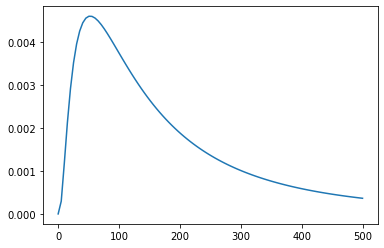

In [6]:
def posterior_density(z):
    # Suppress warnings about log(z) when z < 0 and division by zero 
    # np.where will filter out invalid values
    with np.errstate(divide='ignore', invalid='ignore'):
        return np.where(z > 0, norm.pdf(np.log(z) - mu_hat) / z, 0)
    
z_values = np.linspace(0, 500, 100)
f_values = posterior_density(z_values)

plt.plot(z_values, f_values);

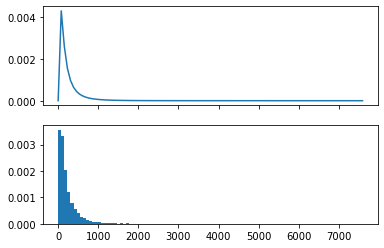

In [7]:
# By simulation:

# Resample from the estimated parametric distribution for X, and calculate Y = exp(X)
Y = np.exp(norm.rvs(loc=mu_hat, scale=sigma, size=10000))

# Recompute ranges for plot based on observed Y values
z_values = np.linspace(0, max(Y), 100)
f_values = posterior_density(z_values)

fig, (ax1,ax2) = plt.subplots(2, 1, sharex='col')
ax1.plot(z_values, f_values)
ax2.hist(Y, density=True, bins=z_values);

**(e)**

In [8]:
# Find percentile from simulated draws

posterior_interval = (
    np.quantile(Y, 0.025),
    np.quantile(Y, 0.975)
)

print("95%% posterior interval:  %.3f, %.3f" % posterior_interval)

95% posterior interval:  19.650, 1001.613


**(f)**